In [27]:
# 作业一：48名应聘者15个方面的主成分分析(exec7.6.xlsx)
"""
数据集：
x1：申请书的形式
x2：外貌
x3：专业能力
x4：讨人喜欢
x5：自信心
x6：精明
x7：诚实
x8：推销能力
x9：经验
x10：积极性
x11：抱负
x12：理解能力
x13：潜力
x14：交际能力
x15：适应性


流程：
1.相关系数矩阵检验（看因子分析是否可行）
2.按方差累计贡献度提取公因子（碎石图）
3.公因子含义解释
4.由公因子计算样本得分，并排序
5.公因子聚类
"""

'\n数据集：\nx1：申请书的形式\nx2：外貌\nx3：专业能力\nx4：讨人喜欢\nx5：自信心\nx6：精明\nx7：诚实\nx8：推销能力\nx9：经验\nx10：积极性\nx11：抱负\nx12：理解能力\nx13：潜力\nx14：交际能力\nx15：适应性\n\n\n流程：\n1.相关系数矩阵检验（看因子分析是否可行）\n2.按方差累计贡献度提取公因子（碎石图）\n3.公因子含义解释\n4.由公因子计算样本得分，并排序\n5.公因子聚类\n'

In [28]:
# 导入函数包和数据集
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer # 因子分析模块
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo # Batlett's检验函数和KMO检验函数
from sklearn.cluster import KMeans

df = pd.read_excel("exec8.6_examp8.1.3应聘者数据.xlsx")

d:\Anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [29]:
# 各变量特征相关性检验
chi_square_value, p_value = calculate_bartlett_sphericity(df)
print(p_value)

kmo_all, kmo_model = calculate_kmo(df)
print(kmo_model)

"""
输出结果如下：
1. Batlett's检验P值为 3.43e-79，明显小于检验水平0.01，故认为各变量间不独立，存在相关性，适合做因子分析
2. KMO系数为0.78，大于给定阈值0.6，故认为各变量间相关性强，适合做因子分析
"""

3.43439913202325e-79
0.783316299871479


"\n输出结果如下：\n1. Batlett's检验P值为 3.43e-79，明显小于检验水平0.01，故认为各变量间不独立，存在相关性，适合做因子分析\n2. KMO系数为0.78，大于给定阈值0.6，故认为各变量间相关性强，适合做因子分析\n"

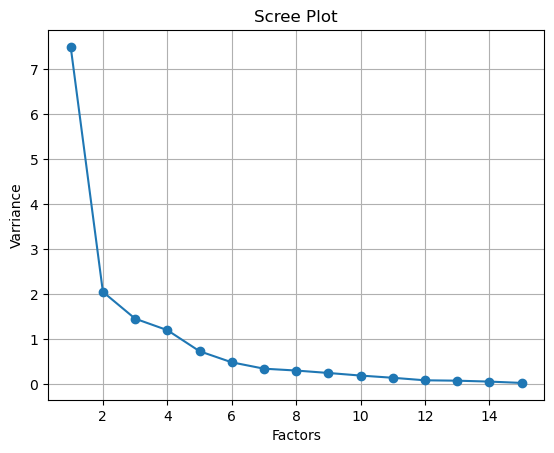

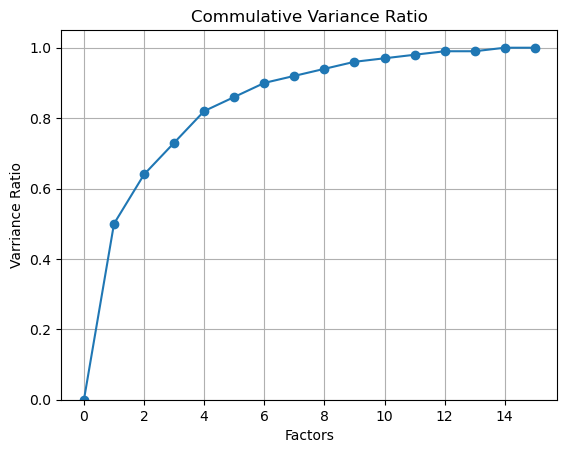

'\n结合碎石图和累计方差贡献率折线图来看，提取前四个因子为公因子最合适。\n'

In [30]:
# 确定公因子个数
# 计算各因子特征值（方差）
FA = FactorAnalyzer(25, rotation=None).fit(df)
Eigenvalue, Eigenvector = FA.get_eigenvalues()

# 计算因子累积方差贡献率
SUM = []
sum0 = np.sum(Eigenvalue)
sum1 = 0
for i in range(len(Eigenvalue)):
    sum1 = sum1+Eigenvalue[i]
    SUM.append(round(sum1/sum0,2))

# 碎石图
X = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.plot(X,Eigenvalue, marker="o")
plt.title("Scree Plot")  
plt.xlabel("Factors")
plt.ylabel("Varriance")
plt.grid()
plt.show()

# 累计方差贡献率折线图
X = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.plot(X,[0]+SUM, marker="o")
plt.title("Commulative Variance Ratio")  
plt.xlabel("Factors")
plt.ylabel("Varriance Ratio")
plt.ylim(0,1.05)
plt.grid()
plt.show()

"""
结合碎石图和累计方差贡献率折线图来看，提取前四个因子为公因子最合适。
"""

In [31]:
# 提取并解释公因子
# 建立因子分析模型
FA_4 = FactorAnalyzer(4, rotation='varimax').fit(df)

# 输出载荷矩阵（成分矩阵）
loading_matrix = pd.DataFrame(FA_4.loadings_, index=df.columns)
print(loading_matrix) 
"""
               0         1         2         3
申请书的形式  0.136026  0.716866  0.089917 -0.102352
外貌      0.430620  0.163812  0.295650  0.121426
专业能力    0.068971  0.134846  0.007018  0.670128
讨人喜欢    0.226997  0.241938  0.837321 -0.082447
自信力     0.913621 -0.092261  0.164350 -0.075567
精明      0.833593  0.120247  0.275188  0.014953
诚实      0.243851 -0.216313  0.769541 -0.017565
推销能力    0.904007  0.228490  0.082392 -0.066582
经验      0.084599  0.789009 -0.041318  0.194450
积极性     0.760335  0.366025  0.175208 -0.049931
抱负      0.903729  0.181930  0.100702 -0.056503
理解能力    0.790302  0.274663  0.347022  0.151780
潜力      0.731792  0.348046  0.437907  0.247923
交际能力    0.422966  0.387304  0.534653 -0.616947
适应性     0.366118  0.780005  0.075339  0.090782
"""

# 解释各公因子含义
"""
各变量与第一公因子关系较大的为：自信力（0.913621）、精明（0.833593）、推销能力（0.904007）、抱负（0.903729）、积极性（0.760335）、理解能力（0.790302）、潜力（0.731792）
各变量与第二公因子关系较大的为：申请书的形式（0.716866）、经验（0.789009）、适应性（0.780005）
各变量与第三公因子关系较大的为：讨人喜欢（0.837321）、诚实（0.769541）
各变量与第四公因子关系较大的为：专业能力（0.670128）、交际能力（-0.616947）
"""

               0         1         2         3
申请书的形式  0.136026  0.716866  0.089917 -0.102352
外貌      0.430620  0.163812  0.295650  0.121426
专业能力    0.068971  0.134846  0.007018  0.670128
讨人喜欢    0.226997  0.241938  0.837321 -0.082447
自信力     0.913621 -0.092261  0.164350 -0.075567
精明      0.833593  0.120247  0.275188  0.014953
诚实      0.243851 -0.216313  0.769541 -0.017565
推销能力    0.904007  0.228490  0.082392 -0.066582
经验      0.084599  0.789009 -0.041318  0.194450
积极性     0.760335  0.366025  0.175208 -0.049931
抱负      0.903729  0.181930  0.100702 -0.056503
理解能力    0.790302  0.274663  0.347022  0.151780
潜力      0.731792  0.348046  0.437907  0.247923
交际能力    0.422966  0.387304  0.534653 -0.616947
适应性     0.366118  0.780005  0.075339  0.090782


'\n各变量与第一公因子关系较大的为：自信力（0.913621）、精明（0.833593）、推销能力（0.904007）、抱负（0.903729）、积极性（0.760335）、理解能力（0.790302）、潜力（0.731792）\n各变量与第二公因子关系较大的为：申请书的形式（0.716866）、经验（0.789009）、适应性（0.780005）\n各变量与第三公因子关系较大的为：讨人喜欢（0.837321）、诚实（0.769541）\n各变量与第四公因子关系较大的为：专业能力（0.670128）、交际能力（-0.616947）\n'

In [32]:
# 计算各公因子得分绝对值并排序
"""
由于公因子表现为各变量或特征的线性组合（还有一个影响不大的随机因子），因此除非特别声明各变量同等重要或给定各变量重要性权重，否则它们的加和正负
并没有实际意义，公因子绝对值大小仅表现为与公因子的紧密程度。
"""
df_score = pd.DataFrame(FA_4.transform(df))

# 第一公因子排序
Order1 = np.argsort(np.abs(df_score[0]))[::-1]
print(Order1[0], Order1[1], Order1[2])
"""
排序结果为：17 18 5
"""
# 第二公因子排序
Order2 = np.argsort(np.abs(df_score[1]))[::-1]
print(Order2[0], Order2[1], Order2[2])
"""
排序结果为：25 43 35
"""
# 第三公因子排序
Order3 = np.argsort(np.abs(df_score[2]))[::-1]
print(Order3[0], Order3[1], Order3[2])
"""
排序结果为：42 34 16
"""
# 第四公因子排序
Order4 = np.argsort(np.abs(df_score[3]))[::-1]
print(Order4[0], Order4[1], Order4[2])
"""
排序结果为：15 38 12
"""

17 18 5
25 43 35
42 34 16
15 38 12


'\n排序结果为：15 38 12\n'

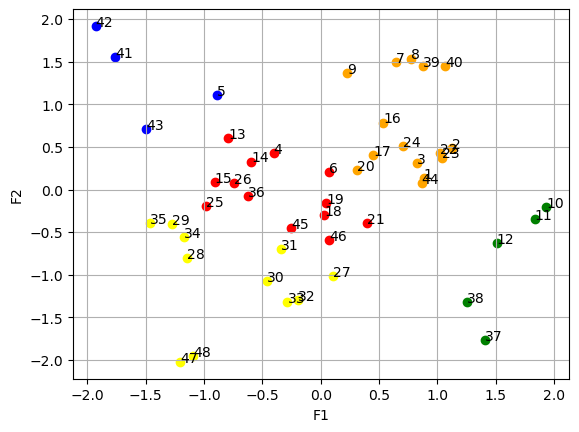

In [33]:
# 主成分聚类及可视化（以第一，第二公因子为例，聚成五类）
df1 = pd.DataFrame({"F1":df_score[0], "F2":df_score[1]})
km = KMeans(n_clusters=5).fit(df1) 
length = df.shape[0]
label = km.labels_
fig=plt.figure()
for i in range(length):
    if label[i] == 0:
        plt.scatter(df_score[0][i], df_score[1][i], color="red")
    elif label[i] == 1:
        plt.scatter(df_score[0][i], df_score[1][i], color="orange")
    elif label[i] == 2:
        plt.scatter(df_score[0][i], df_score[1][i], color="yellow")   
    elif label[i] == 3:
        plt.scatter(df_score[0][i], df_score[1][i], color="blue")
    else:
        plt.scatter(df_score[0][i], df_score[1][i], color="green")
    plt.text(df_score[0][i], df_score[1][i],str(i+1))

plt.xlabel("F1")
plt.ylabel("F2")
plt.grid()
plt.show()